# Practical session on `xarray`

## Instructions

- Load the `python-training/misc/data/mesh_mask_eORCA1_v2.2.nc` file using `open_dataset`.

- Extract the surface (`z=0`) and first time step (`t=0`) using `isel`

- Plot the land-sea mask (`tmask`) variable.

- Compute the cell surface (`e1t x e2t`)

- Load the `python-training/misc/data/surface_thato.nc` file using `open_dataset`.

- Extract the SST (`thetao` variable) at the surface (`olevel=0`)

- Compute and display the time-average SST

- Compute the mean SST over years 1958-1962

- Compute the mean over years 2014-2018

- Plot the SST difference between 2018-2014 and 1958-1962

- Compute the SST global mean time-series (weight by cell surface $e1t \times e2t$)

- Remove the monthly clim from the time-series using `groupy` on `time_counter.month`

- Compute the rolling mean of the time-series, using a 3-year window. Plot the raw and smoothed anomalies

## Corrections

- Load the `python-training/misc/data/mesh_mask_eORCA1_v2.2.nc` file using `open_dataset`.

In [1]:
import xarray as xr

mesh = xr.open_dataset('data/mesh_mask_eORCA1_v2.2.nc')
mesh

<xarray.Dataset>
Dimensions:  (t: 1, y: 332, x: 362, z: 75)
Dimensions without coordinates: t, y, x, z
Data variables:
    e1t      (t, y, x) float64 ...
    e2t      (t, y, x) float64 ...
    e3t_0    (t, z, y, x) float64 ...
    glamf    (t, y, x) float32 ...
    glamt    (t, y, x) float32 ...
    gphif    (t, y, x) float32 ...
    gphit    (t, y, x) float32 ...
    tmask    (t, z, y, x) int8 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  08/11/2019 15:49:38 +0100
    history:    Tue Aug 24 09:30:40 2021: ncks -O -v tmask,glamf,gphif,gphit,...
    NCO:        netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net,...

- Extract the surface (`z=0`) and first time step (`t=0`) using `isel`

In [2]:
mesh = mesh.isel(z=0, t=0)
mesh

<xarray.Dataset>
Dimensions:  (y: 332, x: 362)
Dimensions without coordinates: y, x
Data variables:
    e1t      (y, x) float64 ...
    e2t      (y, x) float64 ...
    e3t_0    (y, x) float64 ...
    glamf    (y, x) float32 ...
    glamt    (y, x) float32 ...
    gphif    (y, x) float32 ...
    gphit    (y, x) float32 ...
    tmask    (y, x) int8 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  08/11/2019 15:49:38 +0100
    history:    Tue Aug 24 09:30:40 2021: ncks -O -v tmask,glamf,gphif,gphit,...
    NCO:        netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net,...

- Plot the land-sea mask (`tmask`) variable.

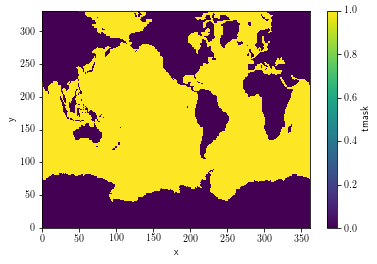

In [3]:
tmask = mesh['tmask']
tmask.plot()

- Compute the cell surface (`e1t x e2t`)

In [4]:
surface = mesh['e1t'] * mesh['e2t']
surface

<xarray.DataArray (y: 332, x: 362)>
array([[1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       ...,
       [4.96784478e+07, 4.96784478e+07, 1.68195300e+08, ...,
        1.68195300e+08, 4.96784478e+07, 4.96784478e+07],
       [3.18035791e+07, 3.18035791e+07, 1.55003643e+08, ...,
        1.55003643e+08, 3.18035791e+07, 3.18035791e+07],
       [3.18035791e+07, 3.18035791e+07, 1.55003643e+08, ...,
        1.55003643e+08, 3.18035791e+07, 3.18035791e+07]])
Dimensions without coordinates: y, x

Here the output DatarArray has no name. You can give him one as follows:

In [5]:
surface.name = 'surface'
surface

<xarray.DataArray 'surface' (y: 332, x: 362)>
array([[1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       [1.60000000e+01, 1.60000000e+01, 1.60000000e+01, ...,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01],
       ...,
       [4.96784478e+07, 4.96784478e+07, 1.68195300e+08, ...,
        1.68195300e+08, 4.96784478e+07, 4.96784478e+07],
       [3.18035791e+07, 3.18035791e+07, 1.55003643e+08, ...,
        1.55003643e+08, 3.18035791e+07, 3.18035791e+07],
       [3.18035791e+07, 3.18035791e+07, 1.55003643e+08, ...,
        1.55003643e+08, 3.18035791e+07, 3.18035791e+07]])
Dimensions without coordinates: y, x

- Load the `python-training/misc/data/surface_thato.nc` file using `open_dataset`.

In [6]:
data = xr.open_dataset('data/surface_thetao.nc')
data

<xarray.Dataset>
Dimensions:               (y: 332, x: 362, nvertex: 4, olevel: 1, axis_nbounds: 2, time_counter: 732)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * olevel                (olevel) float32 0.5058
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1958-01-16 12:00:00 ... 2018-...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lat        (y, x, nvertex) float32 ...
    bounds_nav_lon        (y, x, nvertex) float32 ...
    olevel_bounds         (olevel, axis_nbounds) float32 ...
    thetao                (time_counter, olevel, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    time_counter_bounds   (time_counter, axis_nbounds) object ...
Attributes:
    name:                      GCB-eORCA1-JRA14-CO2ANTH_1m_grid_T
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2019-Oct-25 14:55:39 GMT
    uuid:                      dfe6b939-ae41-42de-977a-3a151c062065
    LongName:                  ORCA1_LIM3_PISCES NEMO configuration
    history:                   Tue Aug 24 09:26:54 2021: ncks -L 9 surface_th...
    NCO:                       netCDF Operators version 4.9.1 (Homepage = htt...
    nco_openmp_thread_number:  1

- Extract the SST (`thetao` variable) at the surface (`olevel=0`)

In [7]:
thetao = data['thetao'].isel(olevel=0)
thetao

<xarray.DataArray 'thetao' (time_counter: 732, y: 332, x: 362)>
[87974688 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    olevel         float32 0.5058
    time_centered  (time_counter) object 1958-01-16 12:00:00 ... 2018-12-16 1...
  * time_counter   (time_counter) object 1958-01-16 12:00:00 ... 2018-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_conservative_temperature
    long_name:           sea_water_potential_temperature
    units:               degree_C
    online_operation:    average
    interval_operation:  1 month
    interval_write:      1 month
    cell_methods:        time: mean
    cell_measures:       area: area

- Compute and display the time-average SST

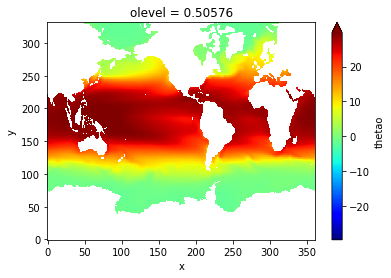

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

theta_mean = thetao.mean(dim='time_counter')
theta_mean.plot(robust=True, cmap=plt.cm.jet)

- Compute the mean SST over years 1958-1962

In [9]:
sst_early = thetao.sel(time_counter=slice('1958-01-01', '1962-12-31')).mean(dim='time_counter')
sst_early

<xarray.DataArray 'thetao' (y: 332, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
    olevel   float32 0.5058
Dimensions without coordinates: y, x

- Compute the mean over years 2014-2018

In [10]:
sst_late = thetao.sel(time_counter=slice('2014-01-01', '2018-12-31')).mean(dim='time_counter')
sst_late

<xarray.DataArray 'thetao' (y: 332, x: 362)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
    olevel   float32 0.5058
Dimensions without coordinates: y, x

- Plot the SST difference between 2014-2018 and 1958-1962

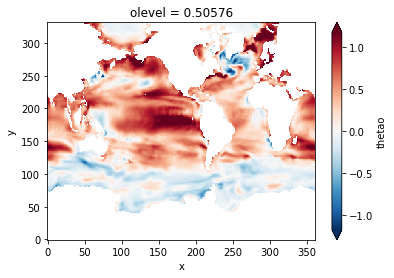

In [11]:
(sst_late - sst_early).plot(robust=True)

- Compute the SST global mean time-series (weight by cell surface $e1t \times e2t$)

A first possibility would be to compute it using `sum`:

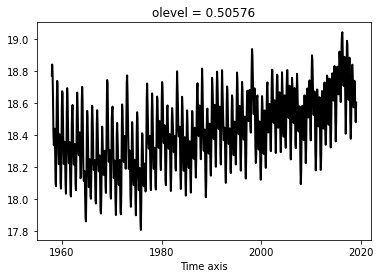

In [12]:
ts1 = (thetao * surface * tmask).sum(dim=['x', 'y']) / ((surface * tmask).sum(dim=['x', 'y']))
ts1.plot()

Another solution would be to use the `xarray.weight` method:

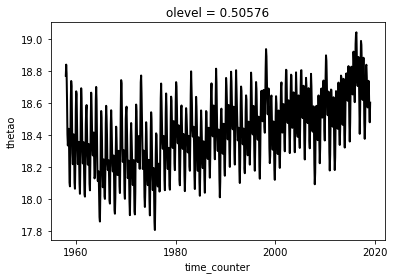

In [13]:
theta_weighted = thetao.weighted(surface * tmask)
ts2 = theta_weighted.mean(dim=['x', 'y'])
ts2.plot()

- Remove the monthly clim from the time-series using `groupy` on `time_counter.month`

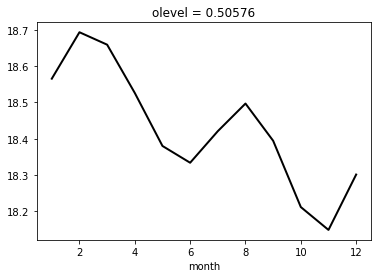

In [14]:
clim = ts1.groupby('time_counter.month').mean(dim='time_counter')
clim.plot()

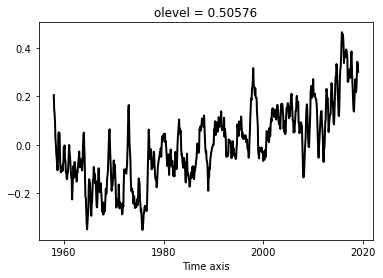

In [15]:
anom = ts1.groupby('time_counter.month') - clim
anom.plot()

- Compute the rolling mean of the time-series, using a 3-year window. Plot the raw and smoothed anomalies

In [16]:
tsroll = anom.rolling(time_counter=3*12 + 1, center=True).mean(dim='time_counter').dropna('time_counter')
tsroll

/home/barrier/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time_counter']'. Passing the 'dim' kwarg to reduction operations has no effect.
  """Entry point for launching an IPython kernel.


<xarray.DataArray (time_counter: 696)>
array([-3.75917894e-02, -4.31766418e-02, -4.79905417e-02, -5.27248509e-02,
       -5.73909217e-02, -6.10540841e-02, -6.47991929e-02, -6.75880931e-02,
       -7.21680041e-02, -7.47213015e-02, -7.54183574e-02, -7.59560522e-02,
       -7.97205163e-02, -8.48085868e-02, -8.79397065e-02, -9.16106189e-02,
       -9.29940113e-02, -9.36864318e-02, -9.36281778e-02, -9.49310480e-02,
       -9.54522487e-02, -9.61445246e-02, -9.57063573e-02, -9.53566924e-02,
       -9.48523413e-02, -9.53026398e-02, -9.66476798e-02, -9.91032265e-02,
       -9.92763432e-02, -9.90789530e-02, -9.77332073e-02, -9.69393097e-02,
       -9.60886126e-02, -9.44236482e-02, -9.15832690e-02, -8.76608436e-02,
       -8.42662787e-02, -8.31027624e-02, -8.42150040e-02, -8.67124815e-02,
       -9.11820048e-02, -9.50429799e-02, -9.93276657e-02, -1.04367369e-01,
       -1.10019382e-01, -1.12589072e-01, -1.15500044e-01, -1.19030303e-01,
       -1.21328102e-01, -1.22604122e-01, -1.23015603e-01, -1.25352343e-01,
       -1.28752738e-01, -1.32901609e-01, -1.37672675e-01, -1.41331329e-01,
       -1.43540661e-01, -1.45733089e-01, -1.46563607e-01, -1.47840023e-01,
       -1.48443398e-01, -1.49906927e-01, -1.52963849e-01, -1.54386801e-01,
       -1.56194641e-01, -1.58370392e-01, -1.62440335e-01, -1.67565708e-01,
       -1.72405804e-01, -1.75409051e-01, -1.77953418e-01, -1.80622847e-01,
       -1.84090128e-01, -1.89183492e-01, -1.94397083e-01, -1.98576885e-01,
       -1.99842797e-01, -1.98386848e-01, -1.97764606e-01, -1.96550245e-01,
...
        1.13885794e-01,  1.13260639e-01,  1.12044677e-01,  1.11914591e-01,
        1.11120051e-01,  1.10989005e-01,  1.10150800e-01,  1.07895851e-01,
        1.01968726e-01,  9.86244181e-02,  9.58485868e-02,  9.35590346e-02,
        9.12008384e-02,  8.94269236e-02,  9.01981249e-02,  9.20260853e-02,
        9.38121638e-02,  9.49175852e-02,  9.73895309e-02,  1.00339364e-01,
        1.03354717e-01,  1.07076241e-01,  1.10727832e-01,  1.15071020e-01,
        1.20330536e-01,  1.25463041e-01,  1.29952811e-01,  1.35375177e-01,
        1.40159156e-01,  1.44918815e-01,  1.48771425e-01,  1.52627357e-01,
        1.56951593e-01,  1.62098744e-01,  1.67139967e-01,  1.74623977e-01,
        1.82149147e-01,  1.88368806e-01,  1.95039813e-01,  2.01657860e-01,
        2.07992544e-01,  2.14542722e-01,  2.21799687e-01,  2.28638689e-01,
        2.35899318e-01,  2.43619466e-01,  2.51841529e-01,  2.59294592e-01,
        2.65847732e-01,  2.72574016e-01,  2.79693848e-01,  2.84327181e-01,
        2.87743694e-01,  2.90866446e-01,  2.92835605e-01,  2.95162731e-01,
        2.98732161e-01,  3.04242696e-01,  3.10189504e-01,  3.15237350e-01,
        3.17775065e-01,  3.18825196e-01,  3.21046825e-01,  3.23766615e-01,
        3.23404495e-01,  3.21989999e-01,  3.21035832e-01,  3.20007661e-01,
        3.19042599e-01,  3.19483519e-01,  3.21134471e-01,  3.22902532e-01,
        3.23083392e-01,  3.21216715e-01,  3.18441935e-01,  3.15436327e-01,
        3.11922124e-01,  3.08617943e-01,  3.05246494e-01,  3.01030139e-01])
Coordinates:
    olevel         float32 0.5058
    time_centered  (time_counter) object 1959-07-16 12:00:00 ... 2017-06-16 0...
  * time_counter   (time_counter) object 1959-07-16 12:00:00 ... 2017-06-16 0...
    month          (time_counter) int64 7 8 9 10 11 12 1 2 ... 11 12 1 2 3 4 5 6

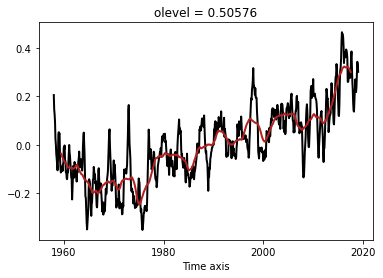

In [17]:
anom.plot(label='raw')
tsroll.plot(label='smoothed')